In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [36]:
x_data = np.linspace(0.0,10.0,1000000)

In [37]:
noise = np.random.randn(len(x_data))

In [38]:
y_true = (0.5 * x_data) + 5 + noise

In [39]:
x_df = pd.DataFrame(data=x_data, columns=["X Data"])

In [40]:
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [41]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [42]:
my_data = pd.concat([x_df, y_df], axis=1)

In [43]:
my_data.head()

,X Data,Y
0,0.00000,4.574765
1,0.00001,4.095452
2,0.00002,6.127469
3,0.00003,6.828504
4,0.00004,4.676901


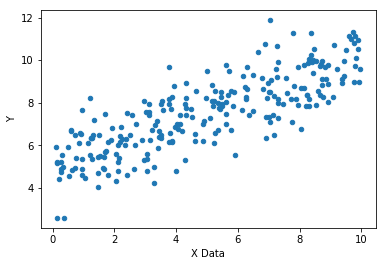

In [44]:
my_data.sample(n=250).plot(kind="scatter", x="X Data", y="Y")

In [45]:
batch_size = 8

In [46]:
np.random.randn(2)

array([ 1.60249682, -0.64469611])

In [47]:
m = tf.Variable(1.26)

In [48]:
b = tf.Variable(0.59)

In [49]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [50]:
y_model = m*xph+b

In [51]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [53]:
init = tf.global_variables_initializer()

In [60]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 100000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [61]:
model_m

0.47495443

In [62]:
model_b

4.9912415

In [63]:
y_hat = x_data*model_m + model_b

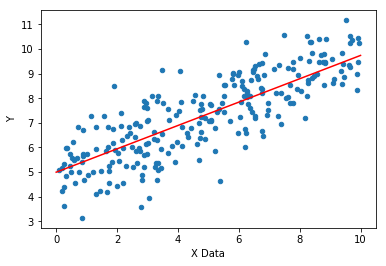

In [64]:
my_data.sample(250).plot(kind="scatter",x="X Data", y="Y")
plt.plot(x_data, y_hat,"r")

# TF ESTIMATOR

In [65]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[1])]

In [66]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\zEros\\AppData\\Local\\Temp\\tmpwdf9a2qc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022F5F6E5710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [70]:
print(x_train.shape)

(700000,)


In [71]:
input_func = tf.estimator.inputs.numpy_input_fn({"x": x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [72]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x": x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [73]:
test_input_func = tf.estimator.inputs.numpy_input_fn({"x": x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [74]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\zEros\AppData\Local\Temp\tmpwdf9a2qc\model.ckpt.
INFO:tensorflow:loss = 457.3809, step = 1
INFO:tensorflow:global_step/sec: 945.924
INFO:tensorflow:loss = 13.835115, step = 101 (0.107 sec)
INFO:tensorflow:global_step/sec: 1336.89
INFO:tensorflow:loss = 22.238794, step = 201 (0.076 sec)
INFO:tensorflow:global_step/sec: 1336.9
INFO:tensorflow:loss = 25.206923, step = 301 (0.074 sec)
INFO:tensorflow:global_step/sec: 1412.22
INFO:tensorflow:loss = 11.251787, 

In [75]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-03-12:57:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\zEros\AppData\Local\Temp\tmpwdf9a2qc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-03-12:57:30
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0650028, global_step = 1000, label/mean = 7.5173125, loss = 8.520022, prediction/mean = 7.398213
INFO:tensorflow:Saving 'checkpoint_path'

In [76]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-03-12:58:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\zEros\AppData\Local\Temp\tmpwdf9a2qc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-03-12:58:50
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0814, global_step = 1000, label/mean = 7.4850893, loss = 8.6512, prediction/mean = 7.3767314
INFO:tensorflow:Saving 'checkpoint_path' sum

In [77]:
print(train_metrics)

{'average_loss': 1.0650028, 'label/mean': 7.5173125, 'loss': 8.520022, 'prediction/mean': 7.398213, 'global_step': 1000}


In [78]:
print(test_metrics)

{'average_loss': 1.0814, 'label/mean': 7.4850893, 'loss': 8.6512, 'prediction/mean': 7.3767314, 'global_step': 1000}


In [79]:
brand_new_data = np.linspace(0,10,10)

In [80]:
input_func_predict = tf.estimator.inputs.numpy_input_fn({"x":brand_new_data}, shuffle=False)

In [81]:
predictions = []

for pred in estimator.predict(input_fn=input_func_predict):
    predictions.append(pred["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\zEros\AppData\Local\Temp\tmpwdf9a2qc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [82]:
predictions

[array([4.4244175], dtype=float32),
 array([5.084964], dtype=float32),
 array([5.7455096], dtype=float32),
 array([6.4060555], dtype=float32),
 array([7.0666018], dtype=float32),
 array([7.727148], dtype=float32),
 array([8.387693], dtype=float32),
 array([9.048241], dtype=float32),
 array([9.708786], dtype=float32),
 array([10.369332], dtype=float32)]

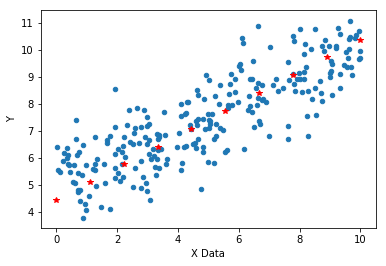

In [87]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(brand_new_data, predictions, "r*")